In [1]:
from utils import *
from scipy import optimize
import matplotlib
import pandas as pd

In [2]:
def g(ell, gp, mean_ntk, data):
    try:
        gp.set_params(**{'kernel__k2__length_scale': ell})
    except:
        gp.set_params(**{'kernel__k1__k2__length_scale': ell})


    gp.fit(data[0], data[1])
    mean = gp.predict(data[2])
    
    return np.sqrt(np.mean((mean_ntk - mean)**2))

In [3]:
z = np.linspace(-2, 2, 100)
x = (z**2 + 1) * np.sin(np.linspace(-np.pi, np.pi, 100))
y = (z**2 + 1) * np.cos(np.linspace(-np.pi, np.pi, 100))

datasets = processing(x, y, z, noise = 0.15)
X, y = datasets['orig']
X_norm, _ = datasets['norm']
X_train, y_train, y_train_noisy = datasets['orig train']
X_norm_train, _, _ = datasets['norm train']

data = (X_train, y_train, X, y)

In [4]:
ntk_1 = (
    ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
    NTK(depth=3, c=2, bias=0.1,
        bias_bounds=(1e-9, 1e2))
)

gp_ntk_1 = GPR(kernel=ntk_1, normalize_y=True, alpha=1e-5, n_restarts_optimizer=9, random_state=3480795)
gp_ntk_1.fit(X_train, y_train)
gp_ntk_1.kernel_

0.23**2 * NTK(depth=3, c=2.000, bias=0.000)

In [ ]:
fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$", figsize=(8, 2.5))
fig.savefig('./illustrative/dataset.svg')

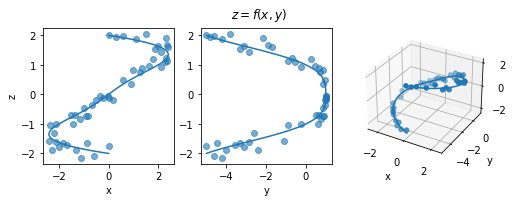

In [7]:
fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$", figsize=(8, 2.5))
fig.savefig('./illustrative/dataset.svg')

Text(0.02, 0.5, '$\\leftarrow$LPK $-$ NTK$\\rightarrow$')

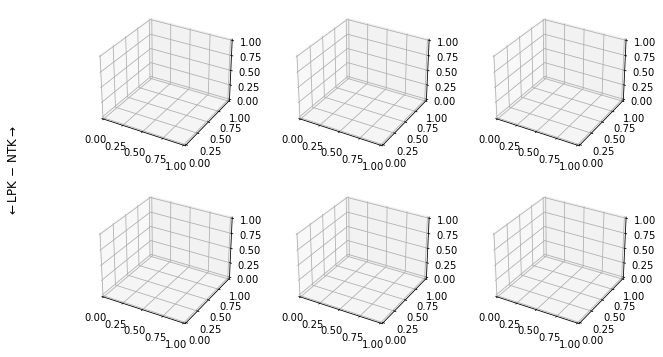

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,6), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)
fig.supylabel(r'$\leftarrow$LPK $-$ NTK$\rightarrow$')

In [6]:
test = [1,2,3]

In [5]:
arrays_lpk = [
    [False, True],  # Norm
    [False, True],  # Noise
    [3, 25, 100],   # Depths
]

index = pd.MultiIndex.from_product(
    arrays_lpk, names=["Norm", "Noise", "Depth"])

df= pd.DataFrame(
    index=index,
    columns=[r'$\beta$', r'$\ell$', 'Constant', 'Noise', r'$\rho_{r}', r'$\rho_{\hat{y}}$', 'RMSE'])

df.index.name = 'Depth'
# print(df.to_latex(escape=False))
test = True, False, 3
df['Constant'][test] = ''
df

$\beta$ $\ell$ Constant Noise $\rho_{r} $\rho_{\hat{y}}$  \
Norm  Noise Depth                                                            
False False 3         NaN    NaN      NaN   NaN       NaN              NaN   
            25        NaN    NaN      NaN   NaN       NaN              NaN   
            100       NaN    NaN      NaN   NaN       NaN              NaN   
      True  3         NaN    NaN      NaN   NaN       NaN              NaN   
            25        NaN    NaN      NaN   NaN       NaN              NaN   
            100       NaN    NaN      NaN   NaN       NaN              NaN   
True  False 3         NaN    NaN            NaN       NaN              NaN   
            25        NaN    NaN      NaN   NaN       NaN              NaN   
            100       NaN    NaN      NaN   NaN       NaN              NaN   
      True  3         NaN    NaN      NaN   NaN       NaN              NaN   
            25        NaN    NaN      NaN   NaN       NaN              NaN   
            100       NaN    NaN      NaN   NaN       NaN              NaN   

                  RMSE  
Norm  Noise Depth       
False False 3      NaN  
            25     NaN  
            100    NaN  
      True  3      NaN  
            25     NaN  
            100    NaN  
True  False 3      NaN  
            25     NaN  
            100    NaN  
      True  3      NaN  
            25     NaN  
            100    NaN

0.878**2 * NTK(depth=3, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.195)
0.878**2 * Matern(length_scale=1.67, nu=0.5) + WhiteKernel(noise_level=0.195)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.747**2 * NTK(depth=25, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.239)
0.747**2 * Matern(length_scale=0.213, nu=0.5) + WhiteKernel(noise_level=0.239)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.777**2 * NTK(depth=100, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.361)
0.777**2 * Matern(length_scale=0.0808, nu=0.5) + WhiteKernel(noise_level=0.361)


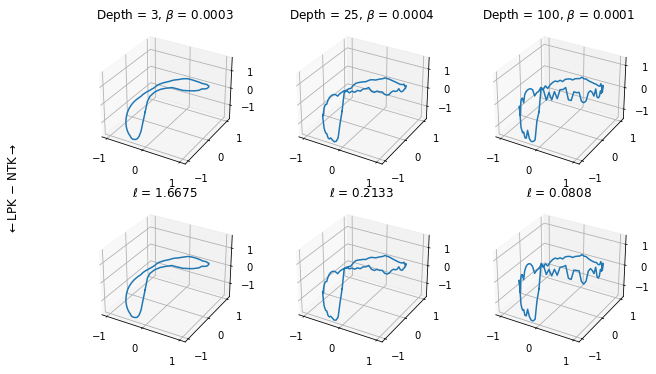

In [21]:
data = [X_norm_train, y_train_noisy, X_norm]
name = 'X_norm_noisy'

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,6), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

for depth in (3, 25, 100):
    # Norm Noise Depth
    if name == 'X_noisy':
        loc = False, True, depth
    elif name == 'X_norm_noisy':
        loc = True, True, depth

    ntk = (
        ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
        NTK(depth=depth, c=2, bias=0.1, 
            bias_bounds=(1e-5, 1e5)) +
        WhiteKernel(
            noise_level=0.15**2, 
            noise_level_bounds=(1e-4, 0.5))#(0.001, 1))
    )

    gp_ntk = GPR(kernel=ntk, normalize_y=True, alpha=1e-5, n_restarts_optimizer=9, random_state=3480795)
    gp_ntk.fit(data[0], data[1])
    mean_ntk = gp_ntk.predict(data[2])

    print(gp_ntk.kernel_)

    lpk = (
        ConstantKernel(
            constant_value=gp_ntk.kernel_.get_params()['k1__k1__constant_value'],
            constant_value_bounds='fixed'
        ) *
        Matern(
            nu=1/2,
            # anisotropic true -> trying to fit product of laplace kernels with different lengthscales
            length_scale=1,
            length_scale_bounds='fixed'
        ) + 
        WhiteKernel(
            noise_level=gp_ntk.kernel_.get_params()['k2__noise_level'],
            noise_level_bounds='fixed'
        )
    )

    gp_lpk = GPR(kernel=lpk, alpha=1e-9, normalize_y=True, n_restarts_optimizer=0, random_state=3480795)

    ell_lpk = optimize.minimize_scalar(g, args=(
        gp_lpk, mean_ntk, data), 
        method='bounded', bounds=[0.0001, 2], options={'maxiter': 10000})
    for i in range(0, 10):
        tmp = optimize.minimize_scalar(g, args=(
            gp_lpk, mean_ntk, data),
            method='bounded', bounds=[0.0001, 10*(10**i)], options={'maxiter': 10000})
        if tmp.fun < ell_lpk.fun:
            ell_lpk = tmp

    try:
        gp_lpk.set_params(**{'kernel__k2__length_scale': ell_lpk.x})
    except:
        gp_lpk.set_params(**{'kernel__k1__k2__length_scale': ell_lpk.x})
    gp_lpk.fit(data[0], data[1])
    mean_lpk_opt = gp_lpk.predict(data[2])

    print(gp_lpk.kernel_)

    fig.supylabel(r'$\leftarrow$LPK $-$ NTK$\rightarrow$')
    #r'$\beta$', 'Constant', 'Noise', r'$\ell$', r'$\rho_{\hat{y}}$', r'$\rho_{\r}'

    df[r'$\beta$'][loc] = round(gp_ntk.kernel_.get_params()['k1__k2__bias'], 4)
    df['Constant'][loc] = round(gp_ntk.kernel_.get_params()['k1__k1__constant_value'], 4)
    df['Noise'][loc] = round(gp_ntk.kernel_.get_params()['k2__noise_level'], 4)
    df[r'$\ell$'][loc] = round(ell_lpk.x, 4)
    df[r'$\rho_{r}'][loc] = round(np.corrcoef((y-mean_ntk)[:,0], (y-mean_lpk_opt)[:,0])[0, 1], 4)
    df[r'$\rho_{\hat{y}}$'][loc] = round(np.corrcoef((mean_ntk)[:,0], (mean_lpk_opt)[:,0])[0, 1], 4)
    df['RMSE'][loc] = round(ell_lpk.fun, 4)
    
    if depth==3: i,j=0,3
    if depth==25: i,j=1,4
    if depth==100: i,j=2,5
    ax[i].plot(data[2][:,0], data[2][:,1], mean_ntk.ravel())
    ax[i].set_title(f"Depth = {depth}, " + r'$\beta$ =' + f" {round(gp_ntk.kernel_.get_params()['k1__k2__bias'], 4)}")
    ax[j].plot(data[2][:,0], data[2][:,1], mean_lpk_opt.ravel())
    ax[j].set_title(r'$\ell$ =' + f" {round(gp_lpk.kernel_.get_params()['k1__k2__length_scale'], 4)}")

1.05**2 * NTK(depth=3, c=2.000, bias=0.009)
1.05**2 * Matern(length_scale=2.51, nu=0.5)
0.683**2 * NTK(depth=25, c=2.000, bias=0.009)
0.683**2 * Matern(length_scale=0.235, nu=0.5)
0.817**2 * NTK(depth=100, c=2.000, bias=0.009)
0.817**2 * Matern(length_scale=0.0924, nu=0.5)


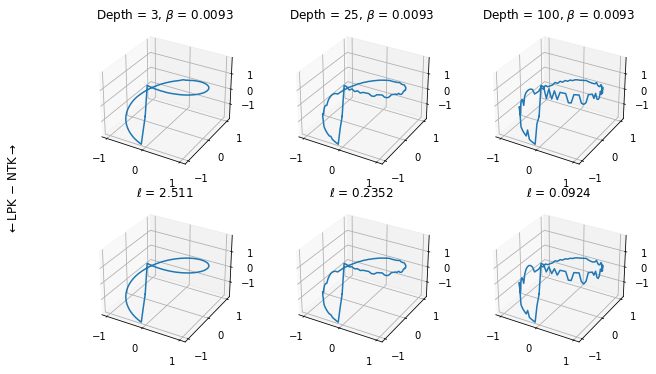

In [13]:
data = [X_norm_train, y_train, X_norm]
name = 'X_norm'

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,6), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

for depth in (3, 25, 100):
    # Norm Noise Depth
    if name == 'X':
        loc = False, False, depth
    elif name == 'X_norm':
        loc = True, False, depth
    ntk = (
        ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
        NTK(depth=depth, c=2, bias=0.1, 
            bias_bounds=(1e-5, 1e5))
    )

    gp_ntk = GPR(kernel=ntk, normalize_y=True, alpha=1e-5, n_restarts_optimizer=9, random_state=3480795)
    gp_ntk.fit(data[0], data[1])
    mean_ntk = gp_ntk.predict(data[2])

    print(gp_ntk.kernel_)

    lpk = (
        ConstantKernel(
            constant_value=gp_ntk.kernel_.get_params()['k1__constant_value'],
            constant_value_bounds='fixed'
        ) *
        Matern(
            nu=1/2,
            # anisotropic true -> trying to fit product of laplace kernels with different lengthscales
            length_scale=1,
            length_scale_bounds='fixed'
        )
    )

    gp_lpk = GPR(kernel=lpk, alpha=1e-9, normalize_y=True, n_restarts_optimizer=0, random_state=3480795)

    ell_lpk = optimize.minimize_scalar(g, args=(
        gp_lpk, mean_ntk, data), 
        method='bounded', bounds=[0.0001, 10], options={'maxiter': 10000})
    for i in range(0, 10):
        tmp = optimize.minimize_scalar(g, args=(
            gp_lpk, mean_ntk, data),
            method='bounded', bounds=[0.0001, 10*(10**i)], options={'maxiter': 10000})
        if tmp.fun < ell_lpk.fun:
            ell_lpk = tmp

    try:
        gp_lpk.set_params(**{'kernel__k2__length_scale': ell_lpk.x})
    except:
        gp_lpk.set_params(**{'kernel__k1__k2__length_scale': ell_lpk.x})
    gp_lpk.fit(data[0], data[1])
    mean_lpk_opt = gp_lpk.predict(data[2])

    print(gp_lpk.kernel_)

    fig.supylabel(r'$\leftarrow$LPK $-$ NTK$\rightarrow$')
    #r'$\beta$', 'Constant', 'Noise', r'$\ell$', r'$\rho_{\hat{y}}$', r'$\rho_{\r}'

    df[r'$\beta$'][loc] = round(gp_ntk.kernel_.get_params()['k2__bias'], 4)
    df['Constant'][loc] = round(gp_ntk.kernel_.get_params()['k1__constant_value'], 4)
    df['Noise'][loc] = '-'
    df[r'$\ell$'][loc] = round(ell_lpk.x, 4)
    df[r'$\rho_{r}'][loc] = round(np.corrcoef((y-mean_ntk)[:,0], (y-mean_lpk_opt)[:,0])[0, 1], 4)
    df[r'$\rho_{\hat{y}}$'][loc] = round(np.corrcoef((mean_ntk)[:,0], (mean_lpk_opt)[:,0])[0, 1], 4)
    df['RMSE'][loc] = round(ell_lpk.fun, 4)
    
    if depth==3: i,j=0,3
    if depth==25: i,j=1,4
    if depth==100: i,j=2,5
    ax[i].plot(data[2][:,0], data[2][:,1], mean_ntk.ravel())
    ax[i].set_title(f"Depth = {depth}, " + r'$\beta$ =' + f" {round(gp_ntk.kernel_.get_params()['k2__bias'], 4)}")
    ax[j].plot(data[2][:,0], data[2][:,1], mean_lpk_opt.ravel())
    ax[j].set_title(r'$\ell$ =' + f" {round(gp_lpk.kernel_.get_params()['k2__length_scale'], 4)}")

In [22]:
df

$\beta$   $\ell$ Constant   Noise $\rho_{r}  \
Norm  Noise Depth                                               
False False 3      0.0017  37.6297    0.053       -    0.9994   
            25     0.0003   0.7567   0.0448       -    0.9939   
            100    0.0015   0.3085   0.0754       -     0.982   
      True  3         0.0   2.0783   0.0836  0.1539    0.8122   
            25     0.0003   1.7379   0.0668  0.1965    0.8243   
            100    0.0004   1.1191   0.0757  0.2721    0.8565   
True  False 3      0.0093    2.511   1.0966       -    0.9999   
            25     0.0093   0.2352   0.4666       -    0.9993   
            100    0.0093   0.0924   0.6676       -    0.9896   
      True  3      0.0003   1.6675   0.7705  0.1955    0.9979   
            25     0.0004   0.2133   0.5584  0.2391    0.9939   
            100    0.0001   0.0808   0.6037  0.3607    0.9919   

                  $\rho_{\hat{y}}$    RMSE  
Norm  Noise Depth                           
False False 3                  1.0  0.0107  
            25              0.9995  0.0354  
            100             0.9963  0.0839  
      True  3               0.9925  0.2896  
            25              0.9646  0.3308  
            100             0.9179  0.3294  
True  False 3                  1.0  0.0051  
            25              0.9999  0.0123  
            100             0.9979  0.0636  
      True  3               0.9998  0.0253  
            25              0.9993   0.046  
            100             0.9959   0.075

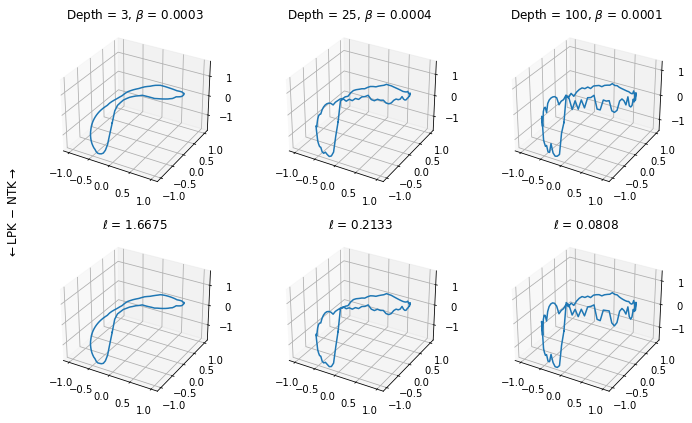

In [23]:
fig.tight_layout()
fig.savefig(f'./illustrative/{name}.svg')
fig

In [24]:
print(df.to_latex(escape=False))

\begin{tabular}{llllllllll}
\toprule
     &      &     & $\beta$ &   $\ell$ & Constant &   Noise & $\rho_{r} & $\rho_{\hat{y}}$ &    RMSE \\
Norm & Noise & Depth &         &          &          &         &           &                  &         \\
\midrule
False & False & 3   &  0.0017 &  37.6297 &    0.053 &       - &    0.9994 &              1.0 &  0.0107 \\
     &      & 25  &  0.0003 &   0.7567 &   0.0448 &       - &    0.9939 &           0.9995 &  0.0354 \\
     &      & 100 &  0.0015 &   0.3085 &   0.0754 &       - &     0.982 &           0.9963 &  0.0839 \\
     & True & 3   &     0.0 &   2.0783 &   0.0836 &  0.1539 &    0.8122 &           0.9925 &  0.2896 \\
     &      & 25  &  0.0003 &   1.7379 &   0.0668 &  0.1965 &    0.8243 &           0.9646 &  0.3308 \\
     &      & 100 &  0.0004 &   1.1191 &   0.0757 &  0.2721 &    0.8565 &           0.9179 &  0.3294 \\
True & False & 3   &  0.0093 &    2.511 &   1.0966 &       - &    0.9999 &              1.0 &  0.0051 \\
     &      

/tmp/ipykernel_102122/4079661275.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(escape=False))


In [13]:
def f(ell_b, ntk, lpk):
    np.random.seed(15874)
    ntk.bias = ell_b

    vals = []
    n=100
    for i in range(0,n):
        x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
        y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
        lpk.length_scale = np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze()
        x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
        y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
        vals.append(np.abs((ntk(x,y) - lpk(x,y)).squeeze()))
        
    return np.sqrt(np.sum(np.array(vals)**2 / n))

1**2 * NTK(depth=3, c=2.000, bias=0.100)
1**2 * Matern(length_scale=1.45, nu=0.5)
1**2 * NTK(depth=25, c=2.000, bias=0.100)
1**2 * Matern(length_scale=0.593, nu=0.5)
1**2 * NTK(depth=100, c=2.000, bias=0.100)
1**2 * Matern(length_scale=0.458, nu=0.5)


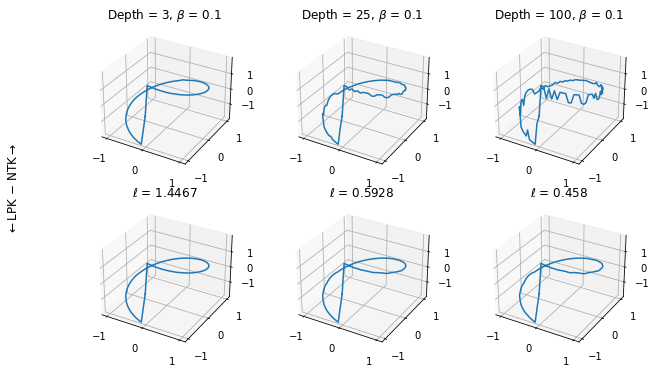

In [21]:
data = [X_norm_train, y_train, X_norm]
name = 'X_norm'

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,6), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

for depth in (3, 25, 100):
    # Norm Noise Depth
    loc = True, False, depth

    ntk = (
        ConstantKernel(constant_value=1.0, constant_value_bounds='fixed')*#(1e-9, 1e5)) * 
        NTK(depth=depth, c=2, bias=0.1, 
            bias_bounds='fixed')#(1e-5, 1e5))
    )

    lpk = (
        ConstantKernel(
            constant_value=1.0,#gp_ntk.kernel_.get_params()['k1__constant_value'],
            constant_value_bounds='fixed'
        ) *
        Matern(
            nu=1/2,
            # anisotropic true -> trying to fit product of laplace kernels with different lengthscales
            length_scale=1,
            length_scale_bounds='fixed'
        )
    )

    bias = optimize.minimize(f, x0=0.1, args=(ntk, lpk), tol=1e-7).x
    # ntk.k2.bias = bias
    x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
    y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
    ell = np.linalg.norm(x-y)/np.log(1/ntk(x,y)).squeeze()

    gp_ntk = GPR(kernel=ntk, normalize_y=True, alpha=1e-5, n_restarts_optimizer=9, random_state=3480795)
    gp_ntk.fit(data[0], data[1])
    mean_ntk = gp_ntk.predict(data[2])

    print(gp_ntk.kernel_)

    lpk = (
        ConstantKernel(
            constant_value=gp_ntk.kernel_.k1.constant_value,#gp_ntk.kernel_.get_params()['k1__constant_value'],
            constant_value_bounds='fixed'
        ) *
        Matern(
            nu=1/2,
            # anisotropic true -> trying to fit product of laplace kernels with different lengthscales
            length_scale=ell,
            length_scale_bounds='fixed'
        )
    )

    gp_lpk = GPR(kernel=lpk, alpha=1e-9, normalize_y=True, n_restarts_optimizer=0, random_state=3480795)

    # ell_lpk = optimize.minimize_scalar(g, args=(
    #     gp_lpk, mean_ntk, data), 
    #     method='bounded', bounds=[0.0001, 10], options={'maxiter': 10000})
    # for i in range(0, 10):
    #     tmp = optimize.minimize_scalar(g, args=(
    #         gp_lpk, mean_ntk, data),
    #         method='bounded', bounds=[0.0001, 10*(10**i)], options={'maxiter': 10000})
    #     if tmp.fun < ell_lpk.fun:
    #         ell_lpk = tmp

    # try:
    #     gp_lpk.set_params(**{'kernel__k2__length_scale': ell_lpk.x})
    # except:
    #     gp_lpk.set_params(**{'kernel__k1__k2__length_scale': ell_lpk.x})
    gp_lpk.fit(data[0], data[1])
    mean_lpk_opt = gp_lpk.predict(data[2])

    print(gp_lpk.kernel_)

    fig.supylabel(r'$\leftarrow$LPK $-$ NTK$\rightarrow$')
    #r'$\beta$', 'Constant', 'Noise', r'$\ell$', r'$\rho_{\hat{y}}$', r'$\rho_{\r}'

    df[r'$\beta$'][loc] = round(gp_ntk.kernel_.get_params()['k2__bias'], 4)
    df['Constant'][loc] = round(gp_ntk.kernel_.get_params()['k1__constant_value'], 4)
    df['Noise'][loc] = '-'
    df[r'$\ell$'][loc] = round(ell_lpk.x, 4)
    df[r'$\rho_{r}'][loc] = round(np.corrcoef((y-mean_ntk)[:,0], (y-mean_lpk_opt)[:,0])[0, 1], 4)
    df[r'$\rho_{\hat{y}}$'][loc] = round(np.corrcoef((mean_ntk)[:,0], (mean_lpk_opt)[:,0])[0, 1], 4)
    df['RMSE'][loc] = round(ell_lpk.fun, 4)
    
    if depth==3: i,j=0,3
    if depth==25: i,j=1,4
    if depth==100: i,j=2,5
    ax[i].plot(data[2][:,0], data[2][:,1], mean_ntk.ravel())
    ax[i].set_title(f"Depth = {depth}, " + r'$\beta$ =' + f" {round(gp_ntk.kernel_.get_params()['k2__bias'], 4)}")
    ax[j].plot(data[2][:,0], data[2][:,1], mean_lpk_opt.ravel())
    ax[j].set_title(r'$\ell$ =' + f" {round(gp_lpk.kernel_.get_params()['k2__length_scale'], 4)}")

In [39]:
lpk.k2.length_scale = 0.55
ntk.k2.bias = 0
ntk, lpk

(1**2 * NTK(depth=100, c=2.000, bias=0.000),
 1**2 * Matern(length_scale=0.55, nu=0.5))

In [60]:
x = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))
y = normalize(np.random.randint(0,100000000, 6).reshape(1,-1))

ntk(x,y) - lpk(x,y)

array([[0.02953164]])